# Import Important Libraries

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install sklearn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import Tk, filedialog
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Load the Data

In [2]:
# Create a simple GUI to prompt the user to choose a file
root = Tk()
root.withdraw()  # Hide the main window

''

In [3]:
# Ask the user to choose a file
file_path = filedialog.askopenfilename(title="Choose a CSV file", filetypes=[("CSV files", "*.csv")])

# Load the Data
df = pd.read_csv(file_path)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Descriptive Statistics

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [7]:
df.shape

(100000, 9)

# Check for Missing Values

In [8]:
#Check for null values in the dataset
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Check the Number of Unique Values in Integer Columns

In [9]:
#Checking the number of unique values
df.select_dtypes(include='int64').nunique()

hypertension            2
heart_disease           2
blood_glucose_level    18
diabetes                2
dtype: int64

In [10]:
#check duplicate values
df.duplicated().sum()

3854

In [11]:
#drop the duplicated values
df = df.drop_duplicates()

In [12]:
df.shape

(96146, 9)

In [13]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


# Explore Numeric Variables with Histograms

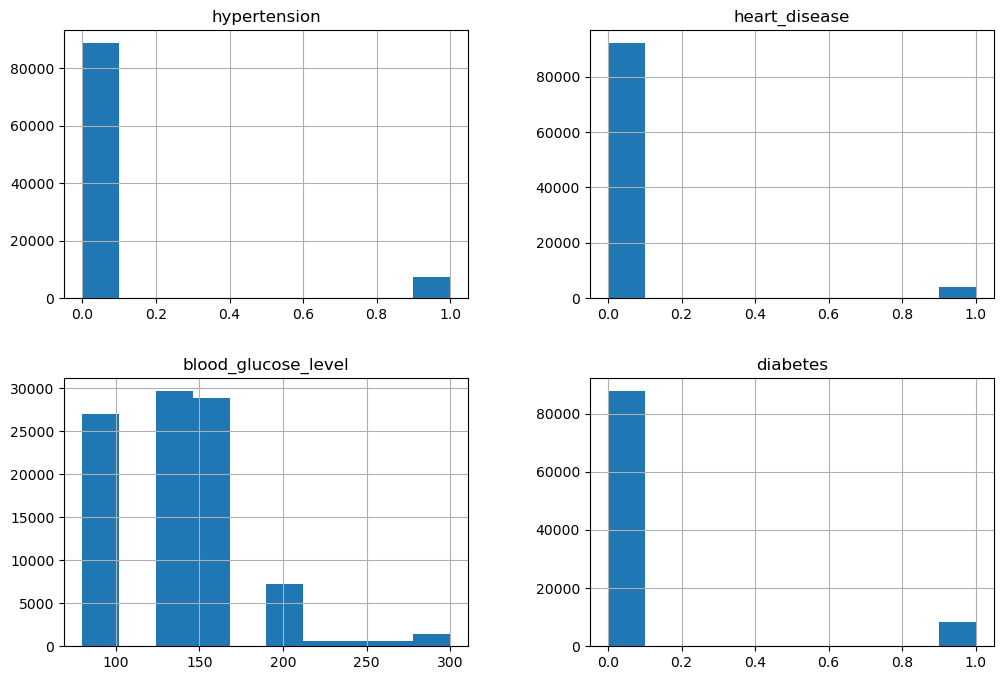

In [14]:
# Histogram for numeric columns
numeric_columns = df.select_dtypes(include=['int64'])
numeric_columns.hist(bins=10, figsize=(12, 8))
plt.show()

# Box Plots for Numeric Variables

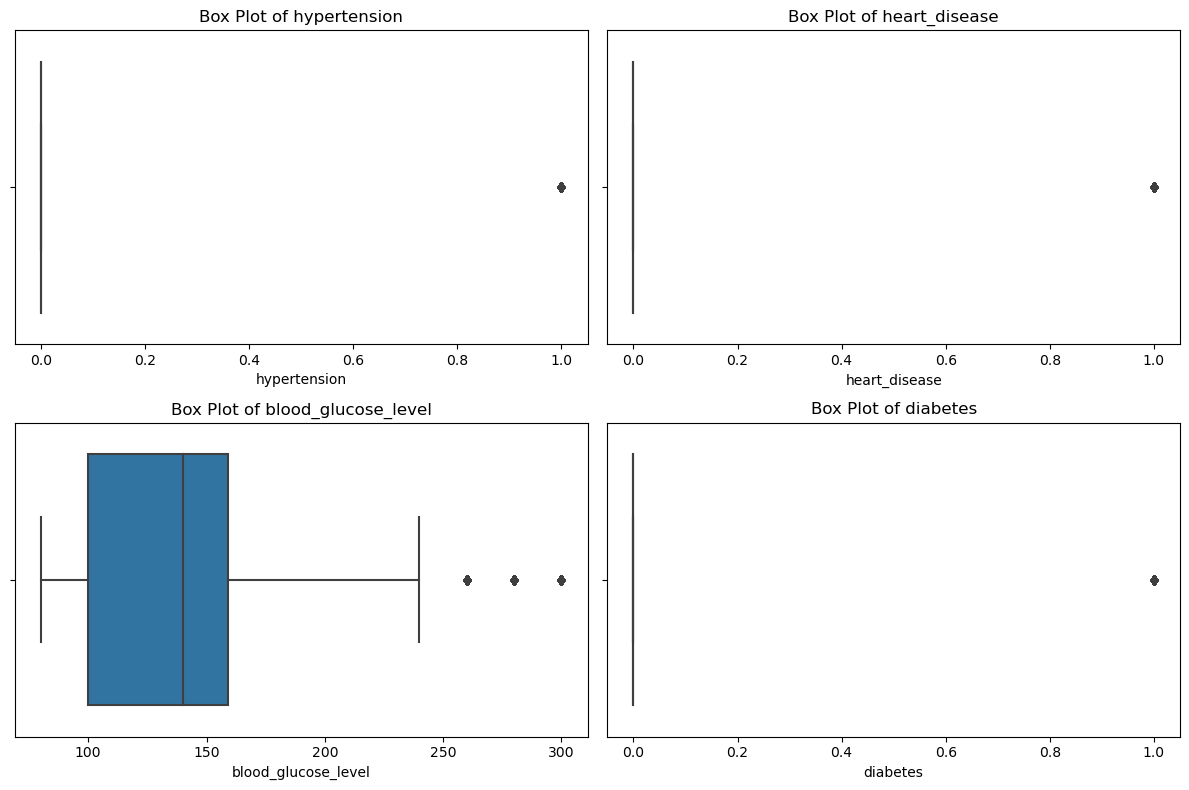

In [15]:
numeric_columns = df.select_dtypes(include=['int64'])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(numeric_columns.columns):
    sns.boxplot(x=col, data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


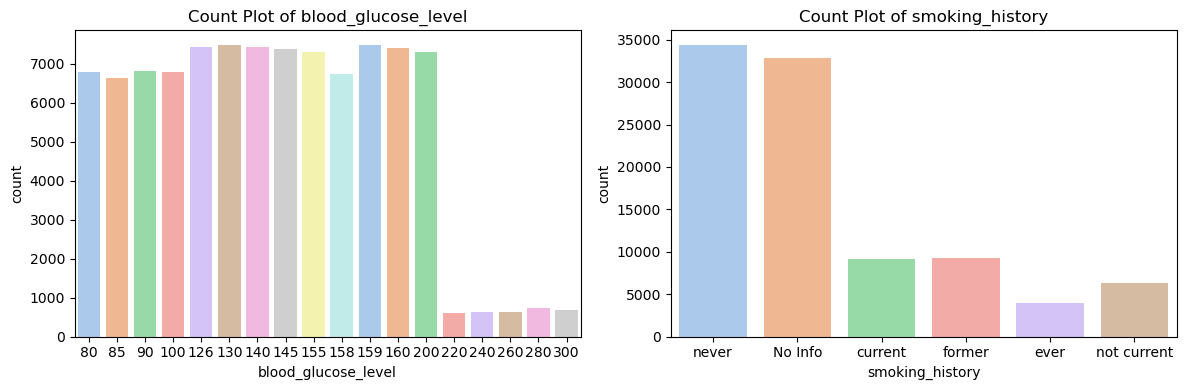

In [16]:
# Combined side-by-side count plot for categorical variables
categorical_columns = ['blood_glucose_level', 'smoking_history']
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(12, 4))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()


# Explore Categorical Variables with Count Plots

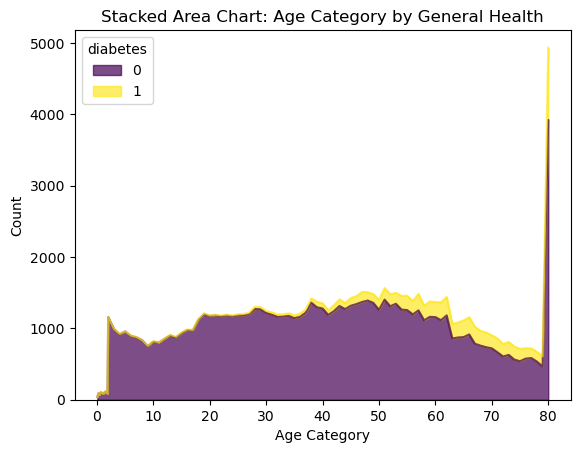

In [17]:
# Stacked Area Chart for diabetes
crosstab = pd.crosstab(df['age'], df['diabetes'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Age Category by General Health')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

# Pair Plot for Numeric Variables

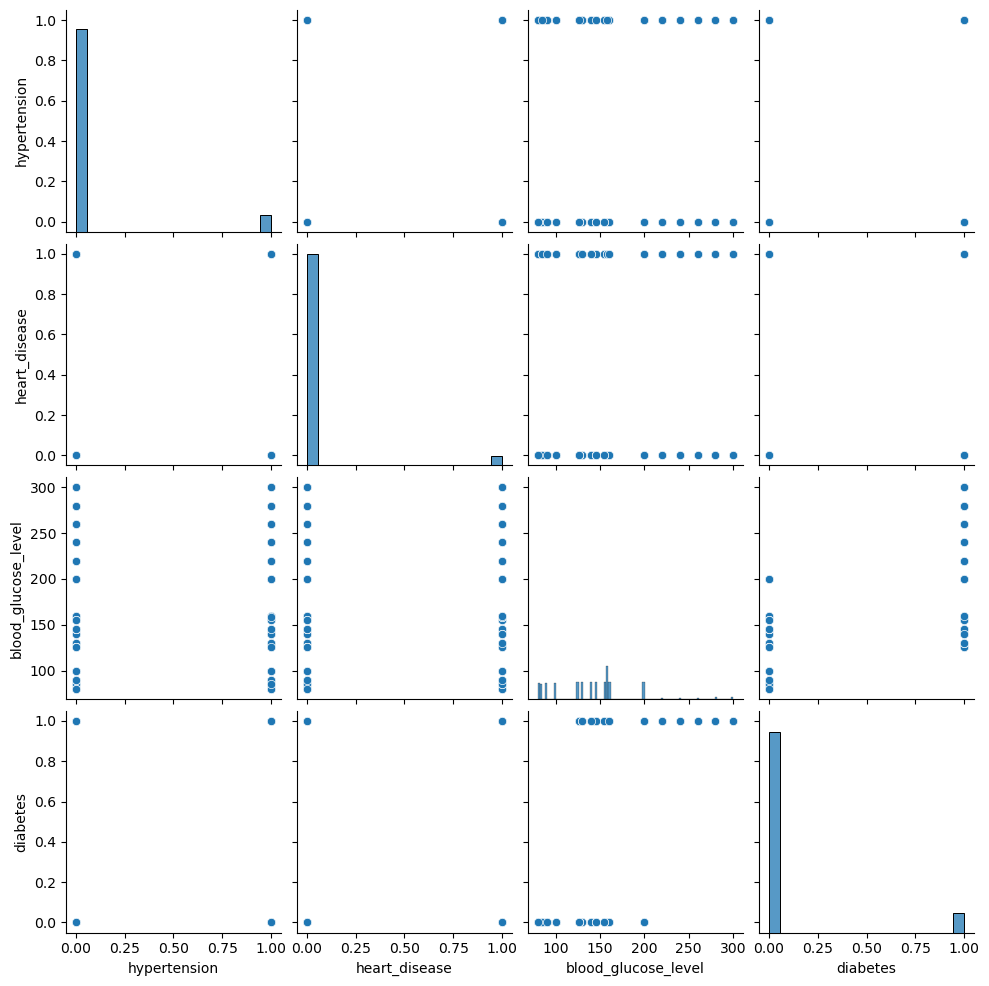

In [18]:
sns.pairplot(df[numeric_columns.columns])
plt.show()

# Distribution of the Target Variable

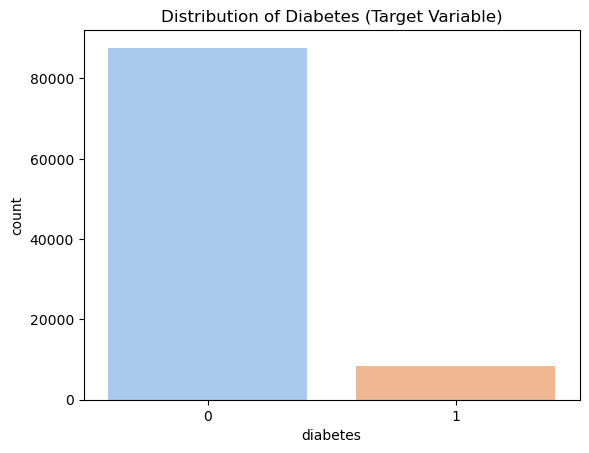

In [19]:
sns.countplot(x='diabetes', data=df, palette='pastel')
plt.title('Distribution of Diabetes (Target Variable)')
plt.show()


# Correlation Heatmap

In [20]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

In [21]:
target_correlation = df_encoded.corr()['diabetes'].sort_values(ascending=False)
print(target_correlation)

diabetes               1.000000
blood_glucose_level    0.424336
HbA1c_level            0.406408
age                    0.264927
bmi                    0.214932
hypertension           0.195710
heart_disease          0.170711
smoking_history        0.088471
gender                 0.037613
Name: diabetes, dtype: float64


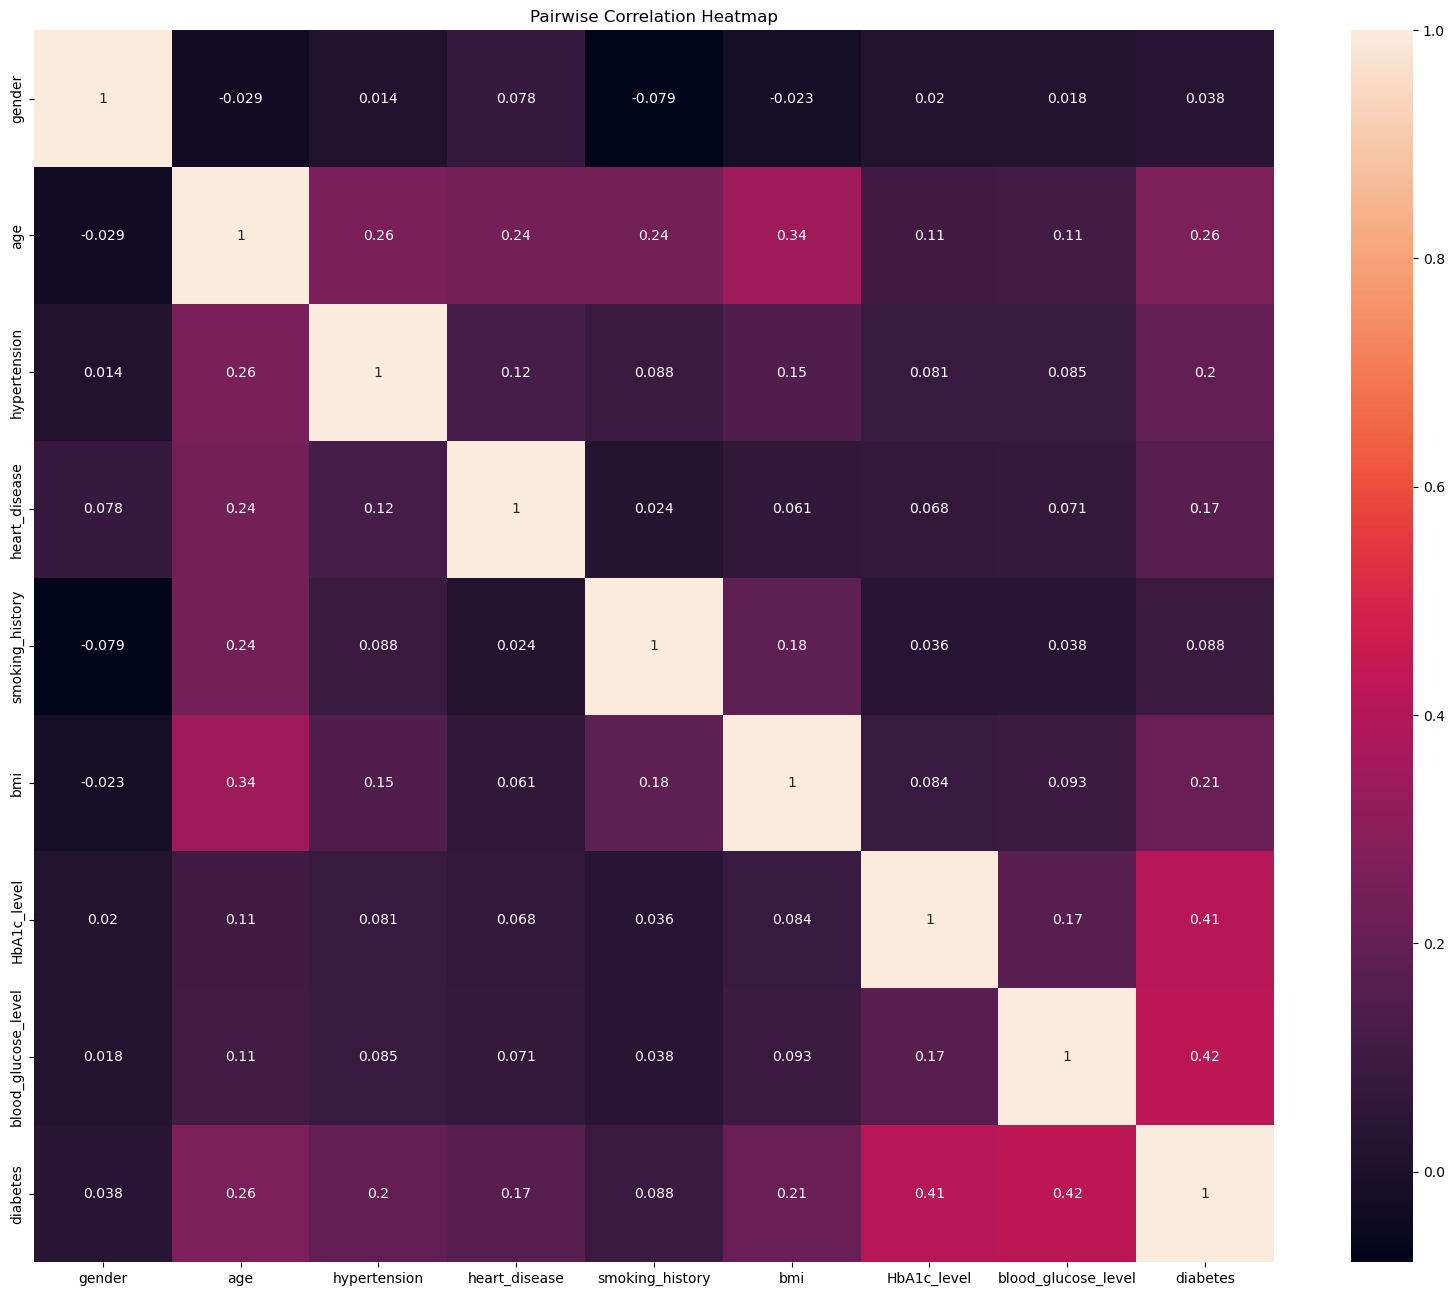

In [22]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), fmt='.2g', annot=True)
plt.title('Pairwise Correlation Heatmap')
plt.show()



# Data Preprocessing

In [23]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Split the Data into Features (X) and Target Variable (y)

In [24]:
# Split the data into features (X) and target variable (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']


# Split the Data into Training and Testing Sets

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression Model

In [27]:
# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Model Evaluation

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.96
Confusion Matrix:
[[17327   182]
 [  644  1077]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.86      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230




# Plot the Confusion Matrix

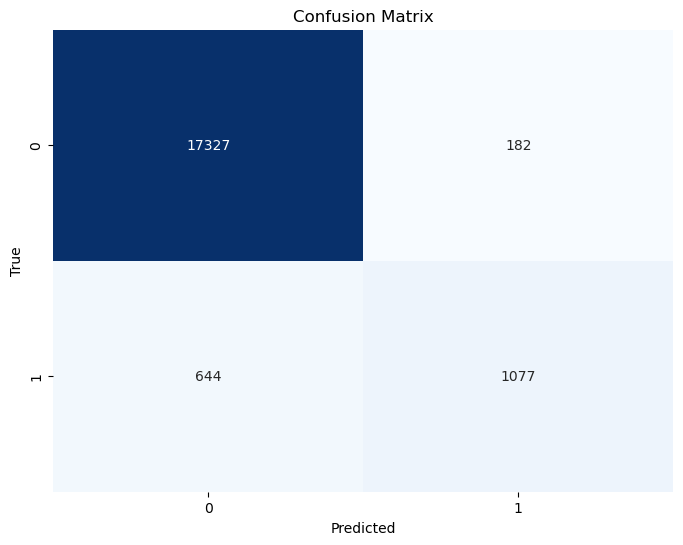

In [30]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



#  Plot the ROC curve

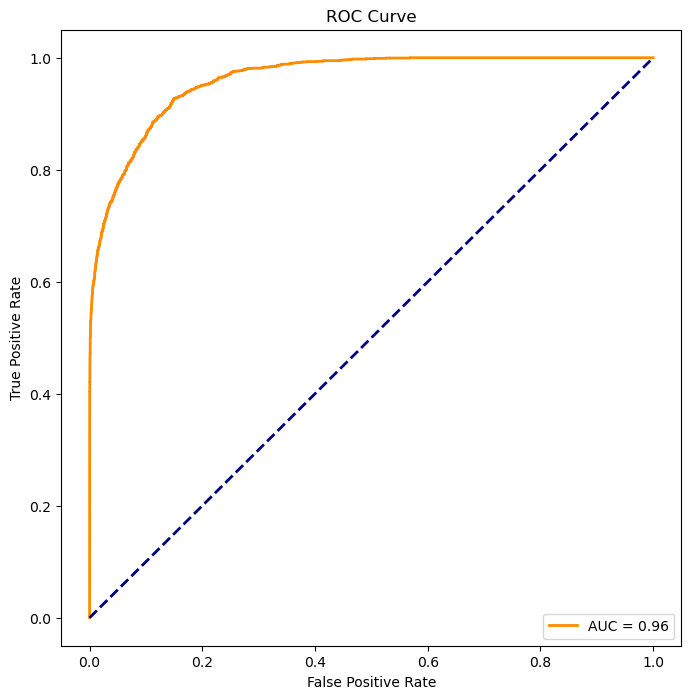

In [31]:
# Train a Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make Predictions on the Test Set
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
